<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/demo/python/WCCI2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GABO: Gene Analysis Base Optimization
This notebook contains the python code used for getting the results reported by J. Gomez and E. Leon in "GABO: Gene Analysis Base Optimization" 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022, pp. 1-8, doi: 10.1109/CEC55065.2022.9870237 (https://dl.acm.org/doi/10.1109/CEC55065.2022.9870237).


## Preliminars
To run scripts in this notebook, you must install sgoal package from the github repository by running the following cell:

In [1]:
!pip install git+https://github.com/jgomezpe/sgoal/

  Cloning https://github.com/jgomezpe/sgoal/ to /tmp/pip-req-build-u8zdh9rv
  Running command git clone --filter=blob:none --quiet https://github.com/jgomezpe/sgoal/ /tmp/pip-req-build-u8zdh9rv
  Resolved https://github.com/jgomezpe/sgoal/ to commit 0d0f1e75cd1d6a218851a7cf74e7f1e46f83786e
  Preparing metadata (setup.py) ... done
  Created wheel for sgoal: filename=sgoal-1.0.0-py3-none-any.whl size=36351 sha256=2a24102bebdbbe98bbdac0f6c5e317320668beb67de5a5c99752d09069216d1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-6vbd6_g4/wheels/09/42/f7/bd35d370e04658336a29af0773f97f7eb9820491a4920daf43
Successfully built sgoal


##Experiments
We can run $R$ times some SGoals on testbed bit array functions.

================= 120 =================
*************** Mixed ***************
SGOAL   SR      MAX       EVALS
GABO 0.17 268.93+/-9.27 8971.7+/-2464.01
RMHC 0.0 263.27+/-4.97 7313.67+/-2222.98
GS1 0.0 209.93+/-3.36 11341.67+/-2288.01
GSC1 0.0 209.67+/-2.68 11762.3+/-1301.94
GGA 0.0 249.4+/-9.04 8284.3+/-2448.12
SSGA 0.0 258.83+/-9.31 8277.0+/-2573.72
CHAVELA 0.2 271.4+/-8.22 11232.2+/-824.23


<Axes: >

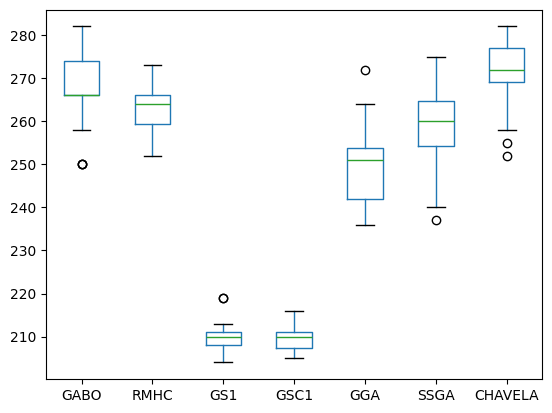

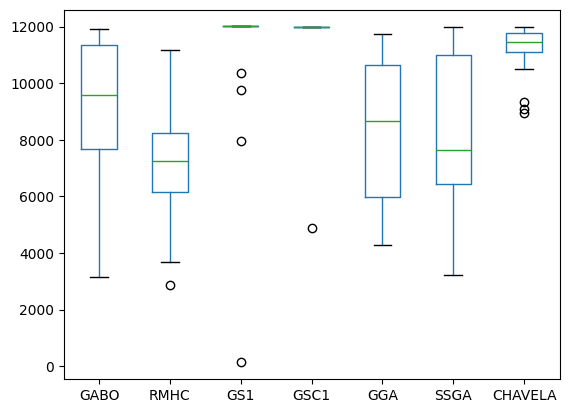

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sgoal.binary import Binary
from sgoal.binary import TestProblem
from sgoal.binary import HC
from sgoal.binary import CHAVELA
from sgoal.binary import GGA
from sgoal.binary import SSGA
from sgoal.binary import RMHC
from sgoal.gabo import GABO
from sgoal.gsc1 import GS1
from sgoal.gsc1 import GSC1
from sgoal.core import experiment

# We format numbers to two decimal positions for presentation purposes
def round(x): return (int(100*x+0.5))/100

# We compute statistical information (average and standard deviation)
def stats(a):
  n = len(a)
  avg = sum(a)/n
  std = 0
  for y in a:
    std += (y-avg)**2
  std = (std/(n-1))**0.5
  return avg, std

# Paper reported values
def report(sgoal, fx, evals, sr):
  avg, std = stats(fx)
  avg, std = round(avg), round(std)
  avg_evals, std_evals = stats(evals)
  avg_evals, std_evals = round(avg_evals), round(std_evals)
  print(sgoal, ' ', round(sr), ' ', avg, '+/-', std, ' ', avg_evals, '+/-', std_evals, sep='')
  return sr, avg, std, avg_evals, std_evals

#Main program
# Search algorithm
sgoal = [GABO, RMHC, GS1, GSC1, GGA, SSGA, CHAVELA]
sgoal_name = ['GABO', 'RMHC', 'GS1', 'GSC1', 'GGA', 'SSGA', 'CHAVELA']
name = ['MaxOnes','GD3','GBD4','RR1', 'Mixed']
F = 4 # Testing the Mixed function. Change the number accordingly
R = 30 # Number of experiments
D = 120 # Problem dimension - Use D = 40*M (M a positive integer to try every function)
EVALS = 100*D # Maximum number of fitness evaluations

df = pd.DataFrame()
dfiter = pd.DataFrame()
print('=================', D, '=================')
print('***************', name[F], '***************')
print('SGOAL   SR      MAX       EVALS')
problem = lambda k: TestProblem(name[F], D, EVALS) # We will no trace additional information
for i in range(len(sgoal)):
  fx, evals, SR = experiment(sgoal[i], problem, R)
  report(sgoal_name[i], fx, evals, SR)
  df[sgoal_name[i]] = fx
  dfiter[sgoal_name[i]] = evals

myFig = plt.figure();
df.boxplot(grid=False)
myFig = plt.figure();
dfiter.boxplot(grid=False)